# Benchmark Dataset Upload Time using TurboML

This notebook aims to benchmark the dataset validation and upload time using TurboML SDK. We are using `IEEE-CIS Fraud Detection` dataset downloaded using [amazon-science/FDB](https://github.com/amazon-science/fraud-dataset-benchmark). We will be using varying sizes of datasets `[10000,50000,100000,250000,500000]` and analysing

1.   Average Time to upload dataset
2.   Average Rows per Second




# Installing TurboML

In [ ]:
!pip install turboml-installer
import turboml_installer ; turboml_installer.install_on_colab()

Import and initialize the TurboML SDK

In [ ]:
import pandas as pd
import pickle
import turboml as tb
import os

# Replace with your backend_url and api_key below
tb.init(
  backend_url="",
  api_key=""
)

Setup plotly

In [ ]:
! pip install --force-reinstall -U kaleido
! pip install --force-reinstall -U plotly

  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl.metadata (15 kB)
Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Attempting uninstall: kaleido
    Found existing installation: kaleido 0.2.1
    Uninstalling kaleido-0.2.1:
      Successfully uninstalled kaleido-0.2.1


  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: packaging
    Found existing installation: packaging 23.2
    Uninstalling packaging-23.2:
      Successfully uninstalled packaging-23.2
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
ERROR: Operation cancelled by user


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


pio.kaleido.scope.default_format = "svg"

# Import `IEEE-CIS Fraud Detection` dataset using [amazon-science/FDB](https://github.com/amazon-science/fraud-dataset-benchmark)

Kaggle token is needed to import the dataset, upload your `kaggle.json` to current directory and proceed.

In [ ]:
! pip install kaggle faker
! sudo mkdir /root/.config/kaggle
! sudo cp kaggle.json /root/.config/kaggle/kaggle.json && sudo chmod 600 /root/.config/kaggle/kaggle.json
! git clone https://github.com/amazon-science/fraud-dataset-benchmark.git && cd fraud-dataset-benchmark/ && pip install .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.4 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=4000f2f6a7169618854da5d29802633bbddb7c2a3997ec2ae6e4c166f7d50628
  Stored in directory: /root/.cache/pip/wheels/ff/55/fb/b27a466be754d2a06ffe0e37b248d844f090a63b51becea85d
Successfully built kaggle
Cloning into 'fraud-dataset-benchmark'...
remote: Enumerating objects: 258, done.
remote: Counting objects: 100% (255/255), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 258 (delta 113), reused 170 (delta 75), pack-reused 3 (from 1)
Receiving objects: 100% (258/258), 21.96 MiB | 21.42 MiB/s, done.
Resolving deltas: 100% (113/113), done.
Processing /content/fraud-dataset-benchmark
  Preparing metadata (setup.py)

In [ ]:
from fdb.datasets import FraudDatasetBenchmark

key = 'ieeecis'

obj = FraudDatasetBenchmark(
    key=key,
    delete_downloaded=False,
    add_random_values_if_real_na = {
        "EVENT_TIMESTAMP": True,
        "LABEL_TIMESTAMP": True,
        "ENTITY_ID": True,
        "ENTITY_TYPE": True,
        "ENTITY_ID": True,
        "EVENT_ID": True
        }
    )
print(obj.key)

print('Train set: ')
display(obj.train.head())
print(len(obj.train.columns))
print(obj.train.shape)

print('Test set: ')
display(obj.test.head())
print(obj.test.shape)

print('Test scores')
display(obj.test_labels.head())
print(obj.test_labels['EVENT_LABEL'].value_counts())
print(obj.train['EVENT_LABEL'].value_counts(normalize=True))
print('=========')

Data download location /content/tmp
ieeecis
Train set: 


/usr/local/lib/python3.11/site-packages/fdb/preprocessing.py:260: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,EVENT_LABEL,transactionamt,productcd,card1,card2,card3,card5,card6,addr1,dist1,...,id_17,id_19,id_20,devicetype,deviceinfo,EVENT_ID,ENTITY_ID,EVENT_TIMESTAMP,LABEL_TIMESTAMP,ENTITY_TYPE
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000.0,0,68.5,W,13926.0,NaN,150.0,142.0,credit,315.0,19.0,...,NaN,NaN,NaN,NaN,NaN,fa70a393-5275-4088-adb6-add3fb9462ab,13926.0_315.0_-13.0,2021-01-02T00:00:00Z,2024-12-30T19:06:59Z,user
2987001.0,0,29.0,W,2755.0,404.0,150.0,102.0,credit,325.0,NaN,...,NaN,NaN,NaN,NaN,NaN,76683507-d986-4d65-8045-529e705c1a62,2755.0_325.0_1.0,2021-01-02T00:00:01Z,2024-12-30T19:06:59Z,user
2987002.0,0,59.0,W,4663.0,490.0,150.0,166.0,debit,330.0,287.0,...,NaN,NaN,NaN,NaN,NaN,341b1be6-1fa2-4abf-9a7b-a6c1b00b42bd,4663.0_330.0_1.0,2021-01-02T00:01:09Z,2024-12-30T19:06:59Z,user
2987003.0,0,50.0,W,18132.0,567.0,150.0,117.0,debit,476.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0ff4f207-45a1-4765-a228-3221724f4d7f,18132.0_476.0_-111.0,2021-01-02T00:01:39Z,2024-12-30T19:06:59Z,user
2987004.0,0,50.0,H,4497.0,514.0,150.0,102.0,credit,420.0,NaN,...,166.0,542.0,144.0,mobile,SAMSUNG SM-G892A Build/NRD90M,25068072-e81e-43b4-821b-67d9cea89d9c,4497.0_420.0_1.0,2021-01-02T00:01:46Z,2024-12-30T19:06:59Z,user


73
(561013, 73)
Test set: 


,transactionamt,productcd,card1,card2,card3,card5,card6,addr1,dist1,p_emaildomain,...,id_13,id_17,id_19,id_20,devicetype,deviceinfo,EVENT_ID,ENTITY_ID,EVENT_TIMESTAMP,ENTITY_TYPE
TransactionID,,,,,,,,,,,,,,,,,,,,,
3548013.0,125.000000,S,15775.0,481.0,150.0,102.0,credit,330.0,NaN,NaN,...,52.0,166.0,633.0,533.0,desktop,Windows,d71ac773-8e6e-459c-8e6a-a02dc3167111,15775.0_330.0_129.0,2021-06-21T23:11:15Z,user
3548014.0,125.000000,S,15775.0,481.0,150.0,102.0,credit,330.0,NaN,NaN,...,52.0,166.0,633.0,533.0,desktop,Windows,6662a5bd-3866-4131-a610-e0fd1e6a17cf,15775.0_330.0_129.0,2021-06-21T23:11:29Z,user
3548015.0,125.000000,S,15775.0,481.0,150.0,102.0,credit,330.0,NaN,NaN,...,52.0,166.0,633.0,533.0,desktop,Windows,77905ae5-107b-4141-ad02-eb5b1bf6e4b6,15775.0_330.0_129.0,2021-06-21T23:11:45Z,user
3548016.0,125.000000,S,15775.0,481.0,150.0,102.0,credit,330.0,NaN,NaN,...,52.0,166.0,633.0,533.0,desktop,Windows,ce281cd4-d5d9-4046-8fb9-557bd186f373,15775.0_330.0_129.0,2021-06-21T23:12:00Z,user
3548017.0,31.950001,W,9500.0,321.0,150.0,226.0,debit,204.0,74.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6542f9dc-6621-42be-8bdf-266fc9dc9a90,9500.0_204.0_150.0,2021-06-21T23:12:11Z,user


(29527, 71)
Test scores


,EVENT_LABEL,EVENT_ID
TransactionID,,
3548013.0,0,d71ac773-8e6e-459c-8e6a-a02dc3167111
3548014.0,0,6662a5bd-3866-4131-a610-e0fd1e6a17cf
3548015.0,0,77905ae5-107b-4141-ad02-eb5b1bf6e4b6
3548016.0,0,ce281cd4-d5d9-4046-8fb9-557bd186f373
3548017.0,0,6542f9dc-6621-42be-8bdf-266fc9dc9a90


EVENT_LABEL
0    28358
1     1169
Name: count, dtype: int64
EVENT_LABEL
0    0.965252
1    0.034748
Name: proportion, dtype: float64


Encode categorical columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['productcd', 'card6', 'p_emaildomain','r_emaildomain', 'devicetype', 'deviceinfo']

# encode categorical columns
ieee_dataset_train = obj.train.reset_index()
ieee_dataset_train[categorical_cols] = ieee_dataset_train[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

In [ ]:
ieee_dataset_train

,TransactionID,EVENT_LABEL,transactionamt,productcd,card1,card2,card3,card5,card6,addr1,...,id_17,id_19,id_20,devicetype,deviceinfo,EVENT_ID,ENTITY_ID,EVENT_TIMESTAMP,LABEL_TIMESTAMP,ENTITY_TYPE
0,2987000.0,0,68.500,4,13926.0,NaN,150.0,142.0,1,315.0,...,NaN,NaN,NaN,2,1757,fa70a393-5275-4088-adb6-add3fb9462ab,13926.0_315.0_-13.0,2021-01-02T00:00:00Z,2024-12-30T19:06:59Z,user
1,2987001.0,0,29.000,4,2755.0,404.0,150.0,102.0,1,325.0,...,NaN,NaN,NaN,2,1757,76683507-d986-4d65-8045-529e705c1a62,2755.0_325.0_1.0,2021-01-02T00:00:01Z,2024-12-30T19:06:59Z,user
2,2987002.0,0,59.000,4,4663.0,490.0,150.0,166.0,2,330.0,...,NaN,NaN,NaN,2,1757,341b1be6-1fa2-4abf-9a7b-a6c1b00b42bd,4663.0_330.0_1.0,2021-01-02T00:01:09Z,2024-12-30T19:06:59Z,user
3,2987003.0,0,50.000,4,18132.0,567.0,150.0,117.0,2,476.0,...,NaN,NaN,NaN,2,1757,0ff4f207-45a1-4765-a228-3221724f4d7f,18132.0_476.0_-111.0,2021-01-02T00:01:39Z,2024-12-30T19:06:59Z,user
4,2987004.0,0,50.000,1,4497.0,514.0,150.0,102.0,1,420.0,...,166.0,542.0,144.0,1,936,25068072-e81e-43b4-821b-67d9cea89d9c,4497.0_420.0_1.0,2021-01-02T00:01:46Z,2024-12-30T19:06:59Z,user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561008,3548008.0,0,44.500,4,12544.0,321.0,150.0,226.0,2,441.0,...,NaN,NaN,NaN,2,1757,84ba4576-f715-4c14-acc2-1b754e60cafd,12544.0_441.0_171.0,2021-06-21T23:10:39Z,2024-12-30T19:06:59Z,user
561009,3548009.0,0,125.000,3,15775.0,481.0,150.0,102.0,1,330.0,...,166.0,633.0,533.0,0,1574,964af4e3-b48b-493f-9203-fd9f008933ec,15775.0_330.0_129.0,2021-06-21T23:10:41Z,2024-12-30T19:06:59Z,user
561010,3548010.0,0,125.000,3,15775.0,481.0,150.0,102.0,1,330.0,...,166.0,633.0,533.0,0,1574,39d6a928-fc20-482e-9d8f-7c14d374cdf0,15775.0_330.0_129.0,2021-06-21T23:10:58Z,2024-12-30T19:06:59Z,user
561011,3548011.0,0,78.694,0,3901.0,176.0,185.0,224.0,1,NaN,...,225.0,567.0,507.0,1,705,f54fd95a-6933-4bd9-9d51-8c3137a30b1d,3901.0_nan_4.0,2021-06-21T23:11:04Z,2024-12-30T19:06:59Z,user


Resetting index and dropping unnecessary columns.

In [ ]:
# Features dataframe
ieee_features_df = ieee_dataset_train.drop(columns=['EVENT_LABEL', 'EVENT_ID', 'ENTITY_ID', 'EVENT_TIMESTAMP', 'LABEL_TIMESTAMP', 'ENTITY_TYPE','TransactionID']).reset_index()
num_columns = ieee_features_df.shape[1]

# Labels dataframe
ieee_labels_df = ieee_dataset_train['EVENT_LABEL'].reset_index()
num_columns_labels = ieee_labels_df.shape[1]

In [ ]:
ieee_features_df

,index,transactionamt,productcd,card1,card2,card3,card5,card6,addr1,dist1,...,id_02,id_05,id_06,id_09,id_13,id_17,id_19,id_20,devicetype,deviceinfo
0,0,68.500,4,13926.0,NaN,150.0,142.0,1,315.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1757
1,1,29.000,4,2755.0,404.0,150.0,102.0,1,325.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1757
2,2,59.000,4,4663.0,490.0,150.0,166.0,2,330.0,287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1757
3,3,50.000,4,18132.0,567.0,150.0,117.0,2,476.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1757
4,4,50.000,1,4497.0,514.0,150.0,102.0,1,420.0,NaN,...,70787.0,NaN,NaN,NaN,NaN,166.0,542.0,144.0,1,936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561008,561008,44.500,4,12544.0,321.0,150.0,226.0,2,441.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1757
561009,561009,125.000,3,15775.0,481.0,150.0,102.0,1,330.0,NaN,...,1064.0,6.0,0.0,0.0,52.0,166.0,633.0,533.0,0,1574
561010,561010,125.000,3,15775.0,481.0,150.0,102.0,1,330.0,NaN,...,3456.0,6.0,0.0,0.0,52.0,166.0,633.0,533.0,0,1574
561011,561011,78.694,0,3901.0,176.0,185.0,224.0,1,NaN,NaN,...,221020.0,-2.0,-33.0,0.0,27.0,225.0,567.0,507.0,1,705


In [ ]:
ieee_labels_df

,index,EVENT_LABEL
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
561008,561008,0
561009,561009,0
561010,561010,0
561011,561011,0


# Time Tracking Utils

In [ ]:
import time

class TimeTracker:
    def __init__(self):
        self.start_times = {}
        self.end_times = {}
        self.checkpoints = {}
        self.intervals = {}

    def start(self, label="default"):
        """Start the timer for a specific label."""
        self.start_times[label] = time.time()
        self.checkpoints[label] = [self.start_times[label]]
        self.intervals[label] = []
        print(f"Timer '{label}' started.")

    def checkpoint(self, label="default", note=None):
        """Record an intermediate checkpoint for the specified label."""
        if label not in self.start_times:
            raise ValueError(f"Timer '{label}' has not been started.")
        now = time.time()
        elapsed = now - self.checkpoints[label][-1]
        self.checkpoints[label].append(now)
        self.intervals[label].append(elapsed)
        time_elapsed_msg = f"Time elapsed {elapsed:.4f} seconds"
        if note:
            time_elapsed_msg += f" - {note}"
        print(time_elapsed_msg)

    def stop(self, label="default"):
        """Stop the timer for a specific label and return elapsed time."""
        if label not in self.start_times:
            raise ValueError(f"Timer '{label}' has not been started.")
        self.end_times[label] = time.time()
        elapsed = self.end_times[label] - self.start_times[label]
        print(f"Timer '{label}' stopped. Elapsed time: {elapsed:.4f} seconds")
        return elapsed

    def total_time(self, label="default"):
        """Get total elapsed time between start and stop for a label."""
        if label not in self.start_times or label not in self.end_times:
            raise ValueError(f"Timer '{label}' must be started and stopped.")
        return self.end_times[label] - self.start_times[label]

    def reset(self, label="default"):
        """Reset the timer for the specified label."""
        self.start_times.pop(label, None)
        self.end_times.pop(label, None)
        self.checkpoints.pop(label, None)
        print(f"Timer '{label}' has been reset.")

    def get_intervals(self, label="default"):
        """Get intervals for a specific label."""
        return self.intervals[label]

    def get_intervals_starts_with(self, label="default"):
        """Get intervals for label that starts with a specific prefix."""
        return {k: v for k, v in self.intervals.items() if k.startswith(label)}

# Time Analysis

In [ ]:
# initialize timer
timer = TimeTracker()

Upload complete dataset and measure time.

# Features Dataset

In [ ]:
# features dataset
timer.start("ieee_features_complete")
ieee_features = tb.OnlineDataset.from_pd(
  id="ieee_features",
  key_field="index",
  df=ieee_features_df,
  load_if_exists=True,
)
timer.stop("ieee_features_complete")

# Summary
print("    Summary    ")
print("===============")
rows, columns = ieee_features_df.shape
print(f"Dataset shape: {rows} rows and {columns} columns")

memory_features = ieee_features_df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"Total memory usage: {memory_features:.2f} MB")
print(f"Total time taken: {timer.total_time('ieee_features_complete'):.2f}")

Timer 'ieee_features_complete' started.


INFO:turboml.common.dataloader:Uploading 561013 rows to dataset ieee_features
Progress: 100%|██████████| 561k/561k [00:17<00:00, 32.7krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Timer 'ieee_features_complete' stopped. Elapsed time: 49.0262 seconds
    Summary    
Dataset shape: 561013 rows and 68 columns
Total memory usage: 160.51 MB
Total time taken: 49.03


# Labels Dataset

In [ ]:
# labels dataset
timer.start("ieee_labels_complete")
ieee_labels = tb.OnlineDataset.from_pd(
  id="ieee_labels",
  key_field="index",
  df=ieee_labels_df,
  load_if_exists=True,
)
timer.stop("ieee_labels_complete")

# Summary
print("    Summary    ")
print("===============")
rows, columns = ieee_labels_df.shape
print(f"Dataset shape: {rows} rows and {columns} columns")

memory_labels = ieee_labels_df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"Total memory usage: {memory_labels:.2f} MB")
print(f"Total time taken: {timer.total_time('ieee_labels_complete'):.2f}")

Timer 'ieee_labels_complete' started.


INFO:turboml.common.dataloader:Uploading 561013 rows to dataset ieee_labels
Progress: 100%|██████████| 561k/561k [00:02<00:00, 257krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Timer 'ieee_labels_complete' stopped. Elapsed time: 10.5405 seconds
    Summary    
Dataset shape: 561013 rows and 2 columns
Total memory usage: 8.56 MB
Total time taken: 10.54


Uploading features dataset in varying sizes.

In [ ]:
# check if results already stored
filename = "upload_time_intervals.pkl"
if not os.path.exists(filename):
    upload_sizes = [10000,50000,100000,250000,500000]

    for size in upload_sizes:
      timer.start(f"ieee_features_{size}")
      for i in range(5):
        ieee_features = tb.OnlineDataset.from_pd(
          id=f"ieee_features_{size}_{i}",
          key_field="index",
          df=ieee_features_df.head(size),
          load_if_exists=True,
        )
        timer.checkpoint(f"ieee_features_{size}")
      timer.stop(f"ieee_features_{size}")

    results = timer.get_intervals_starts_with("ieee_features_")
    with open(filename, "wb") as f:
      pickle.dump(results, f)

else:
    with open(filename, "rb") as f:
      results = pickle.load(f)

Timer 'ieee_features_10000' started.


INFO:turboml.common.dataloader:Uploading 10000 rows to dataset ieee_features_10000_0
Progress: 100%|██████████| 10.0k/10.0k [00:01<00:00, 6.15krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 8.4119 seconds


INFO:turboml.common.dataloader:Uploading 10000 rows to dataset ieee_features_10000_1
Progress: 100%|██████████| 10.0k/10.0k [00:01<00:00, 5.15krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 8.4013 seconds


INFO:turboml.common.dataloader:Uploading 10000 rows to dataset ieee_features_10000_2
Progress: 100%|██████████| 10.0k/10.0k [00:01<00:00, 6.04krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 8.2188 seconds


INFO:turboml.common.dataloader:Uploading 10000 rows to dataset ieee_features_10000_3
Progress: 100%|██████████| 10.0k/10.0k [00:01<00:00, 6.17krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 8.1492 seconds


INFO:turboml.common.dataloader:Uploading 10000 rows to dataset ieee_features_10000_4
Progress: 100%|██████████| 10.0k/10.0k [00:01<00:00, 5.41krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 8.2966 seconds
Timer 'ieee_features_10000' stopped. Elapsed time: 41.4783 seconds
Timer 'ieee_features_50000' started.


INFO:turboml.common.dataloader:Uploading 50000 rows to dataset ieee_features_50000_0
Progress: 100%|██████████| 50.0k/50.0k [00:02<00:00, 17.9krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 12.1448 seconds


INFO:turboml.common.dataloader:Uploading 50000 rows to dataset ieee_features_50000_1
Progress: 100%|██████████| 50.0k/50.0k [00:02<00:00, 16.7krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 12.2508 seconds


INFO:turboml.common.dataloader:Uploading 50000 rows to dataset ieee_features_50000_2
Progress: 100%|██████████| 50.0k/50.0k [00:02<00:00, 17.3krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 13.3017 seconds


INFO:turboml.common.dataloader:Uploading 50000 rows to dataset ieee_features_50000_3
Progress: 100%|██████████| 50.0k/50.0k [00:02<00:00, 18.0krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 12.2649 seconds


INFO:turboml.common.dataloader:Uploading 50000 rows to dataset ieee_features_50000_4
Progress: 100%|██████████| 50.0k/50.0k [00:02<00:00, 17.3krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 11.9797 seconds
Timer 'ieee_features_50000' stopped. Elapsed time: 61.9426 seconds
Timer 'ieee_features_100000' started.


INFO:turboml.common.dataloader:Uploading 100000 rows to dataset ieee_features_100000_0
Progress: 100%|██████████| 100k/100k [00:04<00:00, 23.6krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 15.1056 seconds


INFO:turboml.common.dataloader:Uploading 100000 rows to dataset ieee_features_100000_1
Progress: 100%|██████████| 100k/100k [00:04<00:00, 23.3krows/s] 
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 17.1855 seconds


INFO:turboml.common.dataloader:Uploading 100000 rows to dataset ieee_features_100000_2
Progress: 100%|██████████| 100k/100k [00:04<00:00, 22.8krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 17.2111 seconds


INFO:turboml.common.dataloader:Uploading 100000 rows to dataset ieee_features_100000_3
Progress: 100%|██████████| 100k/100k [00:04<00:00, 25.0krows/s] 
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 14.1613 seconds


INFO:turboml.common.dataloader:Uploading 100000 rows to dataset ieee_features_100000_4
Progress: 100%|██████████| 100k/100k [00:04<00:00, 24.4krows/s] 
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 14.2045 seconds
Timer 'ieee_features_100000' stopped. Elapsed time: 77.8686 seconds
Timer 'ieee_features_250000' started.


INFO:turboml.common.dataloader:Uploading 250000 rows to dataset ieee_features_250000_0
Progress: 100%|██████████| 250k/250k [00:07<00:00, 31.8krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 22.8046 seconds


INFO:turboml.common.dataloader:Uploading 250000 rows to dataset ieee_features_250000_1
Progress: 100%|██████████| 250k/250k [00:09<00:00, 25.6krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 23.7033 seconds


INFO:turboml.common.dataloader:Uploading 250000 rows to dataset ieee_features_250000_2
Progress: 100%|██████████| 250k/250k [00:10<00:00, 24.6krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 24.7191 seconds


INFO:turboml.common.dataloader:Uploading 250000 rows to dataset ieee_features_250000_3
Progress: 100%|██████████| 250k/250k [00:11<00:00, 21.9krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 24.7426 seconds


INFO:turboml.common.dataloader:Uploading 250000 rows to dataset ieee_features_250000_4
Progress: 100%|██████████| 250k/250k [00:10<00:00, 23.9krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 26.1241 seconds
Timer 'ieee_features_250000' stopped. Elapsed time: 122.0938 seconds
Timer 'ieee_features_500000' started.


INFO:turboml.common.dataloader:Uploading 500000 rows to dataset ieee_features_500000_0
Progress: 100%|██████████| 500k/500k [00:14<00:00, 35.3krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 45.7582 seconds


INFO:turboml.common.dataloader:Uploading 500000 rows to dataset ieee_features_500000_1
Progress: 100%|██████████| 500k/500k [00:13<00:00, 36.1krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 44.9727 seconds


INFO:turboml.common.dataloader:Uploading 500000 rows to dataset ieee_features_500000_2
Progress: 100%|██████████| 500k/500k [00:15<00:00, 33.3krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 45.4800 seconds


INFO:turboml.common.dataloader:Uploading 500000 rows to dataset ieee_features_500000_3
Progress: 100%|██████████| 500k/500k [00:14<00:00, 34.4krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 44.2043 seconds


INFO:turboml.common.dataloader:Uploading 500000 rows to dataset ieee_features_500000_4
Progress: 100%|██████████| 500k/500k [00:13<00:00, 36.4krows/s]
INFO:turboml.common.dataloader:Upload complete. Waiting for server to process messages.


Time elapsed 45.0839 seconds
Timer 'ieee_features_500000' stopped. Elapsed time: 225.4993 seconds


# Plot graphs

Dataset Validation and Upload Time

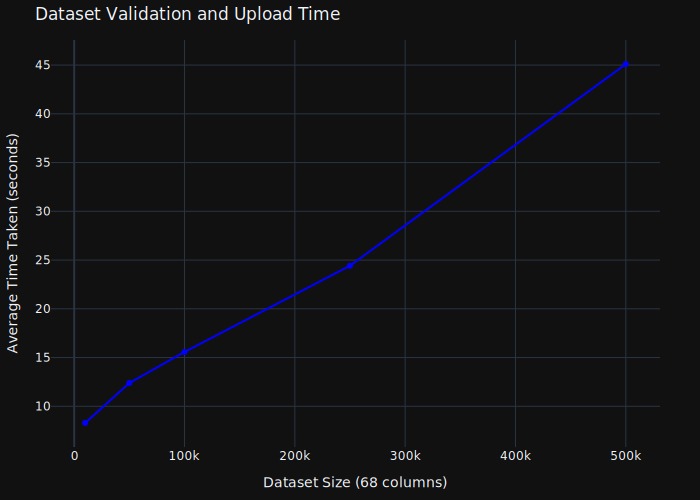

In [ ]:
# Calculate averages for each size
averages = {key: (sum(values) / len(values)) for key, values in results.items() if len(values) > 0}
sizes = [int(key.split('_')[2]) for key in averages.keys()]
average_times = list(averages.values())

# Plot individual graphs and a combined graph
fig = go.Figure()

# Add the average line
fig.add_trace(go.Scatter(
    x=sizes,
    y=average_times,
    mode='lines+markers',
    name='Average Time',
    line=dict(color='blue', width=2)
))

# Customize the layout
fig.update_layout(
    title="Dataset Validation and Upload Time",
    xaxis_title=f"Dataset Size ({num_columns} columns)",
    yaxis_title="Average Time Taken (seconds)",
    template="plotly_dark",
    legend=dict(title="Legend", orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    margin=dict(l=40, r=40, t=40, b=40)
)

# Show the figure
fig.show("svg")

The above plot shows the relationship between dataset size (measured in rows, with 68 columns) and the average time taken (in seconds) for validation and upload.

Dataset Validation and Upload Time: Rows per Second (RPS)

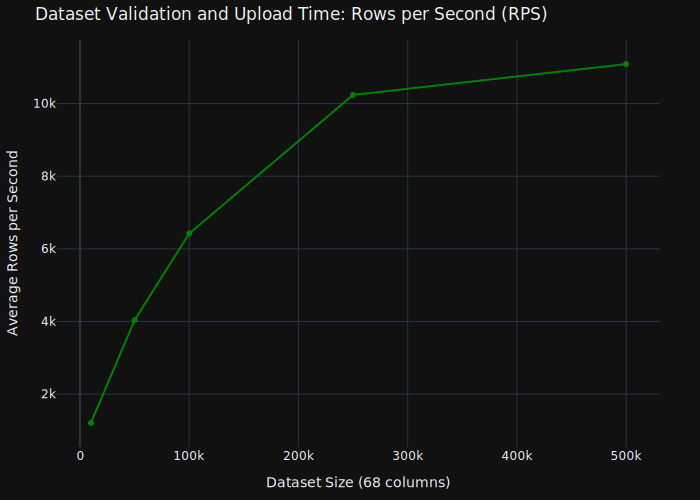

In [ ]:
averages = {key: (sum(values) / len(values)) for key, values in results.items() if len(values) > 0}
sizes = [int(key.split('_')[2]) for key in averages.keys()]

# Calculate Rows Per Second (RPS)
rps = {size: size / avg_time for size, avg_time in zip(sizes, averages.values())}

# Plot individual graphs and a combined graph
fig = go.Figure()

# Add the average RPS line
fig.add_trace(go.Scatter(
    x=sizes,
    y=[rps[size] for size in sizes],
    mode='lines+markers',
    name='Average RPS',
    line=dict(color='green', width=2)
))

# Customize the layout
fig.update_layout(
    title="Dataset Validation and Upload Time: Rows per Second (RPS)",
    xaxis_title=f"Dataset Size ({num_columns} columns)",
    yaxis_title="Average Rows per Second",
    template="plotly_dark",
    legend=dict(title="Legend", orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    margin=dict(l=40, r=40, t=40, b=40)
)

# Show the figure
fig.show("svg")

The plot shows that as dataset size increases, the system's ability to process data (measured in rows per second) also increases.

We observe:
- **Increasing RPS with Dataset Size**: The line graph steadily rises from left to right, indicating a consistent improvement in processing speed as the dataset size grows. This suggests that the system is optimized to handle larger datasets more efficiently.